# Feature Engineering
1. Handling Missing Value
2. Encoding
3. Scaling

# Handling Missing Value


In [1]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [2]:
# import data
df = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/housing_london.csv")
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64

In [3]:
df.shape

(13549, 7)

In [4]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


<Axes: >

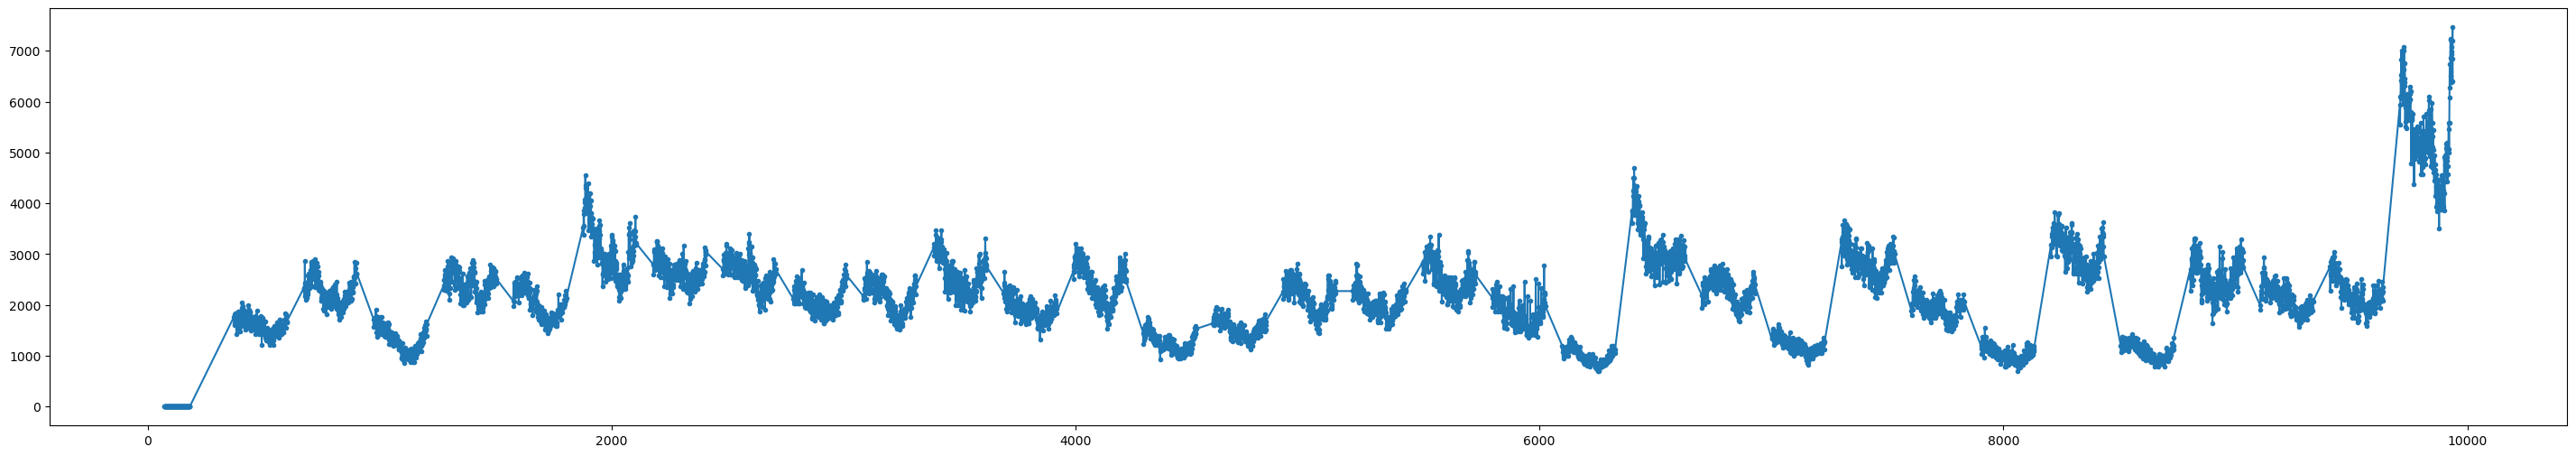

In [6]:
# missing data handling
# kolom no_of_crimes bersifat numerik, discrete
df[(df["no_of_crimes"].isnull() == False)]["no_of_crimes"].plot(marker=".", figsize=(36,6))

In [7]:
df[(df["no_of_crimes"].isnull())]["no_of_crimes"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
13544   NaN
13545   NaN
13546   NaN
13547   NaN
13548   NaN
Name: no_of_crimes, Length: 6110, dtype: float64

In [8]:
df["no_of_crimes"].value_counts()

0.0       104
2039.0     11
1956.0     11
2276.0     10
2114.0     10
         ... 
1947.0      1
3493.0      1
3614.0      1
3241.0      1
6405.0      1
Name: no_of_crimes, Length: 2669, dtype: int64

In [9]:
df2 = df.copy()

# isi missing values dengan value mean
isi = df["no_of_crimes"].mean()
df2["no_of_crimes"] = df["no_of_crimes"].fillna(isi)
df2

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,2158.352063,1
1,1995-02-01,city of london,82203,E09000001,7.0,2158.352063,1
2,1995-03-01,city of london,79121,E09000001,14.0,2158.352063,1
3,1995-04-01,city of london,77101,E09000001,7.0,2158.352063,1
4,1995-05-01,city of london,84409,E09000001,10.0,2158.352063,1
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,2158.352063,0
13545,2019-10-01,england,249376,E92000001,68677.0,2158.352063,0
13546,2019-11-01,england,248515,E92000001,67814.0,2158.352063,0
13547,2019-12-01,england,250410,E92000001,NaN,2158.352063,0


<Axes: ylabel='Frequency'>

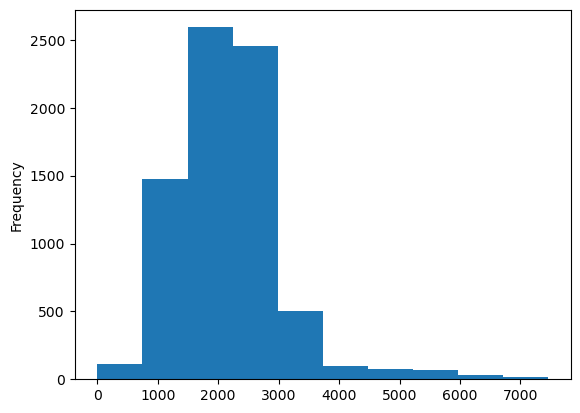

In [10]:
# normal atau tidak
df["no_of_crimes"].plot(kind="hist")

In [11]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


# Encoding

In [12]:
# encoding
le = LabelEncoder()
encoded_area = le.fit_transform(df['area'])
print(le.classes_, len(le.classes_))
display(pd.DataFrame(encoded_area))

['barking and dagenham' 'barnet' 'bexley' 'brent' 'bromley' 'camden'
 'city of london' 'croydon' 'ealing' 'east midlands' 'east of england'
 'enfield' 'england' 'greenwich' 'hackney' 'hammersmith and fulham'
 'haringey' 'harrow' 'havering' 'hillingdon' 'hounslow' 'inner london'
 'islington' 'kensington and chelsea' 'kingston upon thames' 'lambeth'
 'lewisham' 'london' 'merton' 'newham' 'north east' 'north west'
 'outer london' 'redbridge' 'richmond upon thames' 'south east'
 'south west' 'southwark' 'sutton' 'tower hamlets' 'waltham forest'
 'wandsworth' 'west midlands' 'westminster' 'yorks and the humber'] 45


,0
0,6
1,6
2,6
3,6
4,6
...,...
13544,12
13545,12
13546,12
13547,12


In [13]:
# one hot encoding
pd.get_dummies(df, columns = ['area'])

,date,average_price,code,houses_sold,no_of_crimes,borough_flag,area_barking and dagenham,area_barnet,area_bexley,area_brent,...,area_south east,area_south west,area_southwark,area_sutton,area_tower hamlets,area_waltham forest,area_wandsworth,area_west midlands,area_westminster,area_yorks and the humber
0,1995-01-01,91449,E09000001,17.0,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,82203,E09000001,7.0,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,79121,E09000001,14.0,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1995-04-01,77101,E09000001,7.0,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,84409,E09000001,10.0,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13544,2019-09-01,249942,E92000001,64605.0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13545,2019-10-01,249376,E92000001,68677.0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13546,2019-11-01,248515,E92000001,67814.0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13547,2019-12-01,250410,E92000001,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Scaling
- Normalization -> convert data menjadi antara 2 value seperti 0,1 atau -1,1
- Standardization -> convert data menjadi punya mean 0 variance 1

In [14]:
df_dropped = df[['date', 'area', 'houses_sold', 'average_price']].dropna()
df_dropped

,date,area,houses_sold,average_price
0,1995-01-01,city of london,17.0,91449
1,1995-02-01,city of london,7.0,82203
2,1995-03-01,city of london,14.0,79121
3,1995-04-01,city of london,7.0,77101
4,1995-05-01,city of london,10.0,84409
...,...,...,...,...
13542,2019-07-01,england,70681.0,248562
13543,2019-08-01,england,75079.0,249432
13544,2019-09-01,england,64605.0,249942
13545,2019-10-01,england,68677.0,249376


In [15]:
# MinMaxScaler untuk houses_sold
scaler = MinMaxScaler()

cols = ['houses_sold', 'average_price']
data = df_dropped[cols]
display(data.describe())

scaler.fit(data)
print(scaler.data_max_)

df_scaled = pd.DataFrame(scaler.transform(data), columns=cols)
display(df_scaled)

,houses_sold,average_price
count,13455.000000,1.345500e+04
mean,3893.994129,2.622450e+05
std,12114.402476,1.867722e+05
min,2.000000,4.072200e+04
25%,247.000000,1.320400e+05
50%,371.000000,2.222950e+05
75%,3146.000000,3.338770e+05
max,132163.000000,1.463378e+06


[ 132163. 1463378.]


,houses_sold,average_price
0,0.000113,0.035657
1,0.000038,0.029157
2,0.000091,0.026991
3,0.000038,0.025571
4,0.000061,0.030708
...,...,...
13450,0.534795,0.146093
13451,0.568072,0.146704
13452,0.488820,0.147063
13453,0.519631,0.146665


In [16]:
df_scaled.describe()

,houses_sold,average_price
count,13455.000000,13455.000000
mean,0.029449,0.155711
std,0.091664,0.131284
min,0.000000,0.000000
25%,0.001854,0.064188
50%,0.002792,0.127630
75%,0.023789,0.206062
max,1.000000,1.000000


<Axes: ylabel='Frequency'>

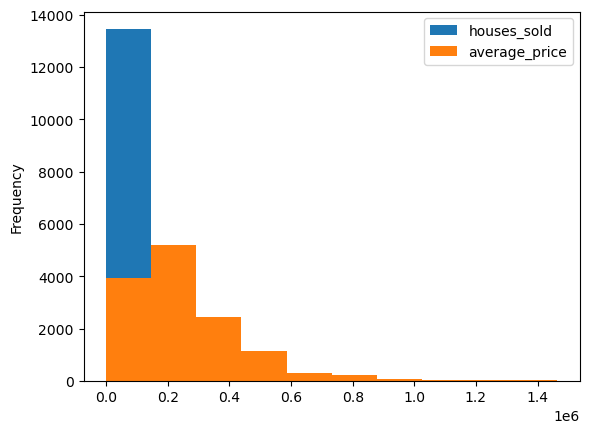

In [17]:
# cek distribusi data
data.plot(kind="hist")

karena bentuk distribusi data tidak normal, baiknya jangan gunakan standard scaler

In [18]:
# Standard Scaler

cols = ['houses_sold', 'average_price']
data = df_dropped[cols]
display(data.describe())

scaler = StandardScaler()
scaler.fit(data)

print(scaler.mean_)

df_scaled2 = pd.DataFrame(scaler.transform(data))

display(df_scaled2)
display(df_scaled2.describe())

,houses_sold,average_price
count,13455.000000,1.345500e+04
mean,3893.994129,2.622450e+05
std,12114.402476,1.867722e+05
min,2.000000,4.072200e+04
25%,247.000000,1.320400e+05
50%,371.000000,2.222950e+05
75%,3146.000000,3.338770e+05
max,132163.000000,1.463378e+06


[  3893.99412858 262245.0262356 ]


,0,1
0,-0.320044,-0.914495
1,-0.320869,-0.964001
2,-0.320291,-0.980503
3,-0.320869,-0.991319
4,-0.320622,-0.952190
...,...,...
13450,5.513230,-0.073263
13451,5.876283,-0.068605
13452,5.011660,-0.065874
13453,5.347801,-0.068905


,0,1
count,13455.000000,1.345500e+04
mean,0.000000,-1.520894e-16
std,1.000037,1.000037e+00
min,-0.321282,-1.186104e+00
25%,-0.301057,-6.971585e-01
50%,-0.290821,-2.139050e-01
75%,-0.061746,3.835400e-01
max,10.588535,6.431243e+00


In [19]:
# silahkan coba scaling data dengan MinMaxScaler dan StandardScaler
# perhatikan perbedaan